# Import Necessary Libraries

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [258]:
pd.set_option('display.max_columns', None)

# Read Data

In [259]:
df_orders = pd.read_csv('orders.csv')
df_orders = df_orders.iloc[:,:24]

df_returns = pd.read_csv('returns.csv')
df_returns = df_returns.iloc[:,:3]

In [260]:
df_returns.drop('Market', axis=1, inplace=True)

#### Merge df_orders and df_returns

In [261]:
df = df_orders.merge(df_returns, on='Order ID', how='left')

In [262]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,NaN
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,NaN
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,NaN
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,NaN


### Creating a new df by removing 'Returned' orders

Doing this for better analysis

In [263]:
df['Returned'].value_counts()

Returned
Yes    3055
Name: count, dtype: int64

In [264]:
df_return = df[df['Returned']=='Yes']

In [265]:
df = df[~(df['Returned']=='Yes')]

# Data Exploration

In [266]:
df.shape

(48240, 25)

In [267]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Returned           object
dtype: object

In [268]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,48240.000000,9192.000000,48240.000000,48240.000000,48240.000000,48240.000000,48240.000000
mean,25967.031571,53879.379352,245.097047,3.452405,0.144818,27.975897,26.197661
std,14890.747617,31796.437616,485.161066,2.275864,0.214171,171.582627,57.220794
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,13052.750000,22153.000000,30.480000,2.000000,0.000000,0.000000,2.590000
50%,26001.500000,53209.000000,84.300000,3.000000,0.000000,9.060000,7.720000
75%,39066.250000,85705.000000,248.851500,5.000000,0.200000,36.401100,24.160000
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


##### Interpretations:

* There are 48240 orders.
* Average Sales per Order is 245.1.
* Average Quatity of Products sold per Order is 3.45
* More than 50% of the products are sold on actual price without any discount given.
* More than 25% of the product are sold with loss.
* Average Sipping Cost is 26.19 and it goes as high as 933.57.


In [269]:
df.describe(include='O').T

,count,unique,top,freq
Order ID,48240,23863,MX-2014-166541,13
Order Date,48240,1427,18-06-2014,129
Ship Date,48240,1464,22-11-2014,122
Ship Mode,48240,4,Standard Class,29024
Customer ID,48240,1590,PO-18850,96
Customer Name,48240,795,Patrick O'Brill,101
Segment,48240,3,Consumer,24936
City,48240,3600,New York City,870
State,48240,1091,California,1663
Country,48240,147,United States,9192


##### Interpretations:

* 'Standard Class' Ship Mode is the most popular.
* Customer with Customer ID 'PO-18850' has Placed the most numer of Orders.
* 'Comsumer' Segment has the highest share among all segments.
* Most number of products were ordered from 'New York' City.
* 'California' led the states in terms of product orders. 
* 'The United States' emerged as the top country for product orders. 
* 'APAC (Asia-Pacific)' was the dominant market for product orders.
* 'The Central Region' had the most product orders. 
* Product with the Product Id 'OFF-AR-10003651' is the bestseller product.
* 'Office Supplies' is the most sought after category.
* 'Binders' emerged as the most popular Sub-Category.
* 'Staples' is the most popular product.
* Medium was the most common order priority.
* Total '3055' number of products are returned.




# Data Pre-processing

### Checking for Duplicate Values

In [270]:
df.duplicated().sum()

0

In [271]:
# Removing the duplicate entries

df = df[~df.duplicated()]

In [272]:
df.duplicated().sum()

0

### Checking for Missing Values

In [273]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       39048
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Returned          48240
dtype: int64

In [274]:
# Removing 'Postal Code' column because of high number of null values

df = df.drop(['Postal Code', 'Returned'], axis=1)

In [275]:
columns = df.columns.values.tolist()

print('Column: No. of unique values in it')
print(('-----------------------------------------------------'))
print(('-----------------------------------------------------'))

for col in columns:
    print(col,':', df[col].nunique())
    print(('-----------------------------------------------------'))

Column: No. of unique values in it
-----------------------------------------------------
-----------------------------------------------------
Row ID : 48240
-----------------------------------------------------
Order ID : 23863
-----------------------------------------------------
Order Date : 1427
-----------------------------------------------------
Ship Date : 1464
-----------------------------------------------------
Ship Mode : 4
-----------------------------------------------------
Customer ID : 1590
-----------------------------------------------------
Customer Name : 795
-----------------------------------------------------
Segment : 3
-----------------------------------------------------
City : 3600
-----------------------------------------------------
State : 1091
-----------------------------------------------------
Country : 147
-----------------------------------------------------
Market : 7
-----------------------------------------------------
Region : 13
---------------

### Assigning correct datatypes

In [276]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

<ipython-input-276-9d9e7d6e3ad3>:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-276-9d9e7d6e3ad3>:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [277]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,2013-06-28,2013-07-01,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,APAC,Oceania,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical


### Renaming Columns' Headers

In [278]:
df = df.rename(columns={'Row ID': 'id',
                        'Order ID': 'order_id',
                        'Order Date': 'order_date',
                        'Ship Date': 'ship_date',
                        'Ship Mode': 'ship_mode',
                        'Customer ID': 'customer_id',
                        'Customer Name': 'customer_name',
                        'Segment': 'segment',
                        'City': 'city',
                        'State': 'state',
                        'Country': 'country',
                        'Market': 'market',
                        'Region': 'region',
                        'Product ID': 'product_id',
                        'Category': 'category',
                        'Sub-Category': 'sub-category',
                        'Product Name': 'product_name',
                        'Sales': 'sales',
                        'Quantity': 'quantity',
                        'Discount': 'discount',
                        'Profit': 'profit',
                        'Shipping Cost': 'shipping_cost',
                        'Order Priority': 'order_priority'})

In [279]:
df.head()

,id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,2013-06-28,2013-07-01,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,APAC,Oceania,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical


In [280]:
df.columns

Index(['id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'market',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'shipping_cost',
       'order_priority'],
      dtype='object')

### Removing some unimportant columns

In [281]:
df = df.drop('id', axis=1)

### Creating a df_order dataframe

In [282]:
df[['order_id','order_date','ship_date','ship_mode','customer_id','segment','city','state','country','market',
    'region', 'order_priority']].duplicated().sum()

23691

In [283]:
 df_order = df[['order_id','order_date','ship_date','ship_mode','customer_id','segment','city','state','country','market',
    'region', 'order_priority']]

In [284]:
cols=[]
for col in df.columns:
    if col not in df_order:
        cols.append(col)

print(cols)

['customer_name', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost']


### Creating num_cols and cat_cols list

In [285]:
num_cols = []
cat_cols = []
date_cols = []

for col in df.columns:
    if df[col].dtype=='O' or col=='quantity':
        cat_cols.append(col)
    elif df[col].dtype=='float64':
        num_cols.append(col)
    else:
        date_cols.append(col)

print('Categorical columns:', cat_cols) 
print()
print('Numerical columns:', num_cols)
print()
print('Date columns:', date_cols)

Categorical columns: ['order_id', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'city', 'state', 'country', 'market', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'quantity', 'order_priority']

Numerical columns: ['sales', 'discount', 'profit', 'shipping_cost']

Date columns: ['order_date', 'ship_date']


# Exploratory Data Analysis

### Univariate Analysis

#### Numerical Columns

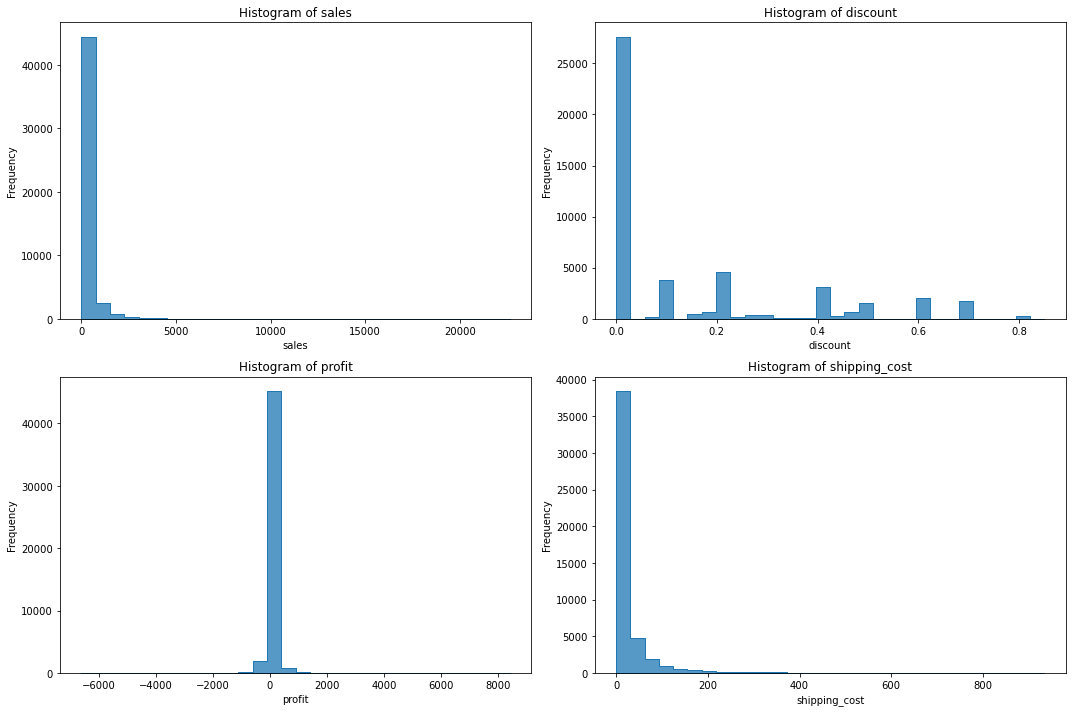

In [286]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, bins=30, ax=axes[i], element="step")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide extra subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

#### *Interpretations:*

* Most of the orders have less than 2500 sales.
* Most of the product are sold at little to no discount.
* Many products are sold with loss.
* Most products have less than 100$ shipping cost.

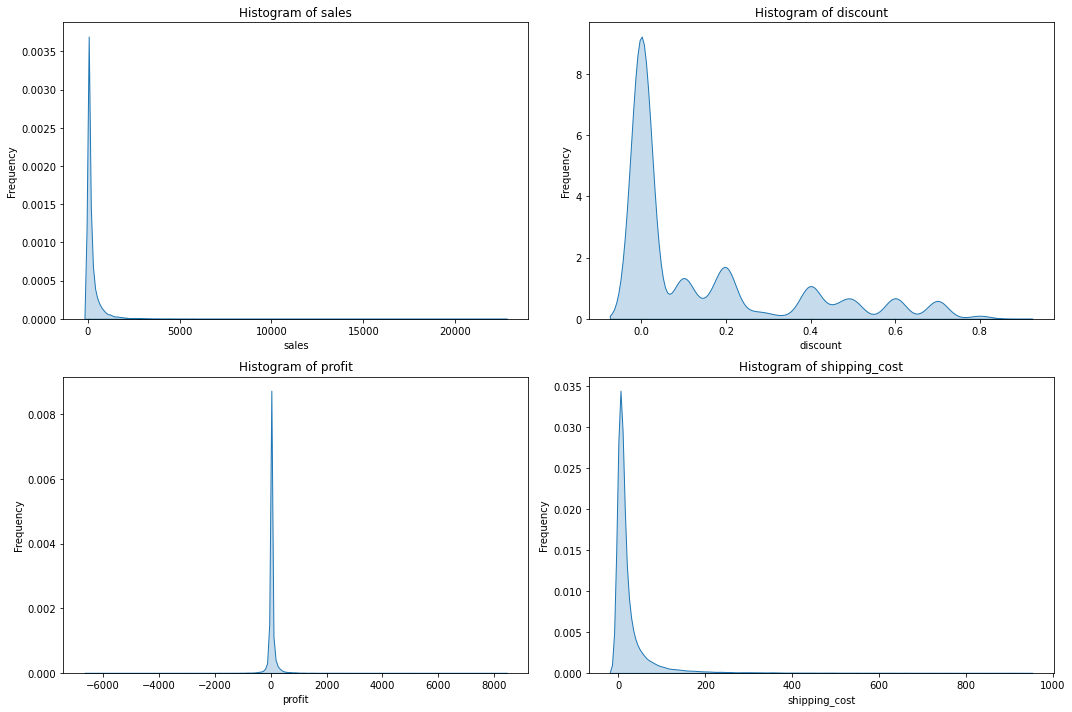

In [287]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], shade=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide extra subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

#### Categorical Columns

In [288]:
columns_to_exclude = ['order_id', 'customer_id', 'customer_name', 'city', 'state', 'country', 'region', 
                      'product_id', 'product_name', 'sub-category']

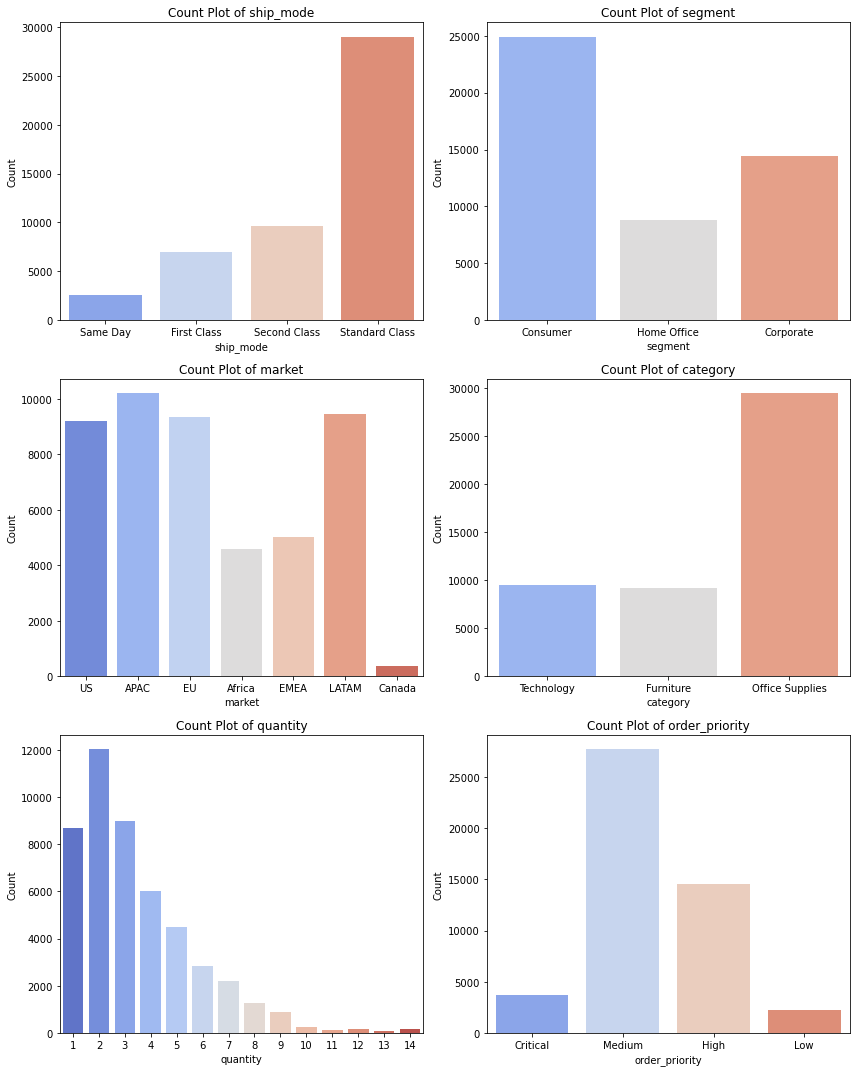

In [289]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,15))
axes = axes.flatten()

# Plot count plots for each categorical column
i=0
for col in cat_cols:
    if col not in columns_to_exclude:
        sns.countplot(data=df, x=col, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'Count Plot of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        i+=1

# Hide extra subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

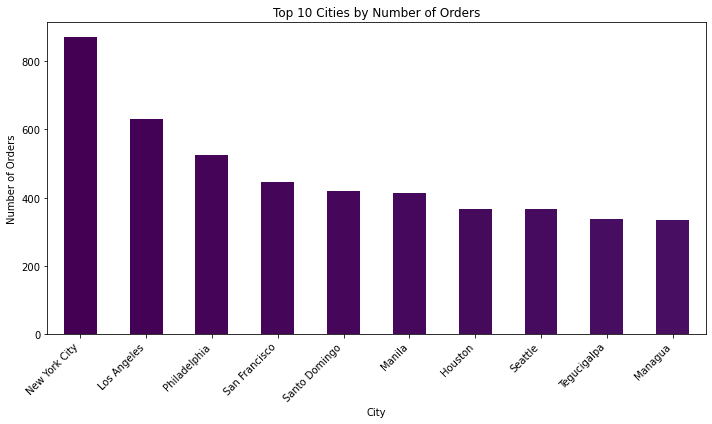

In [290]:
# Getting the top 10 cities
top_cities = df['city'].value_counts().nlargest(10)

# Defining a color palette
colors = plt.cm.viridis(range(10))  # Using the 'viridis' colormap

# Plotting
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color=colors)
plt.title('Top 10 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

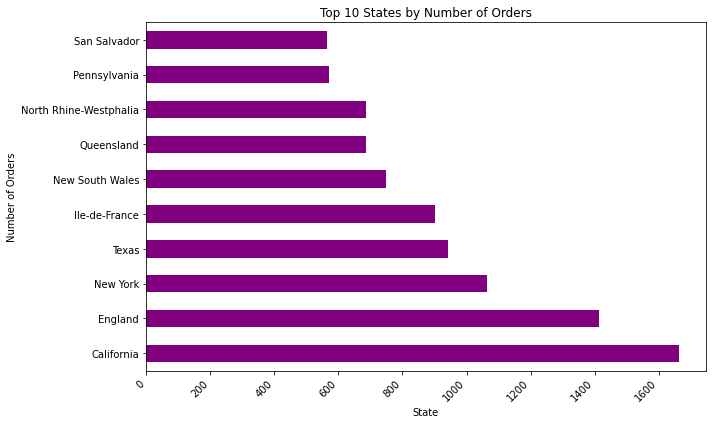

In [291]:
top_states = df['state'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_states.plot(kind='barh', color='purple')
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

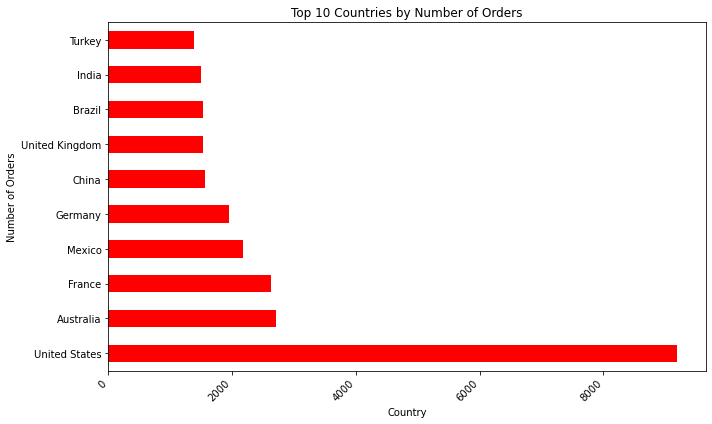

In [292]:
top_countries = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='red')
plt.title('Top 10 Countries by Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

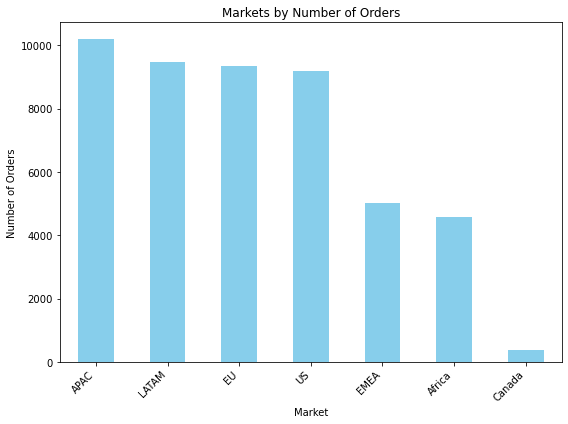

In [293]:
markets = df['market'].value_counts()

plt.figure(figsize=(8, 6))
markets.plot(kind='bar', color='skyblue')
plt.title('Markets by Number of Orders')
plt.xlabel('Market')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

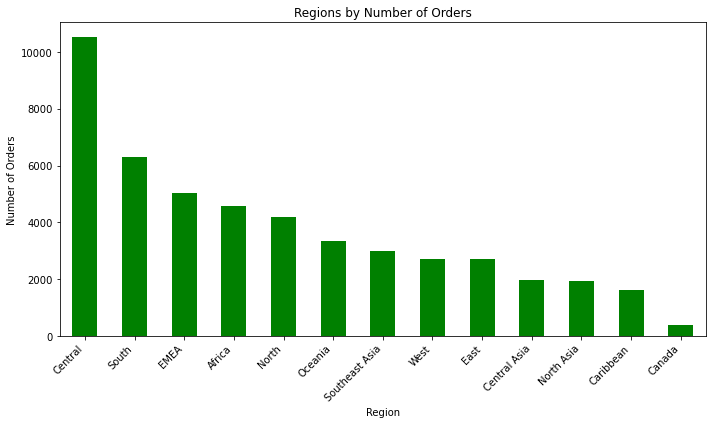

In [294]:
regions = df['region'].value_counts()

plt.figure(figsize=(10, 6))
regions.plot(kind='bar', color='green')
plt.title('Regions by Number of Orders')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

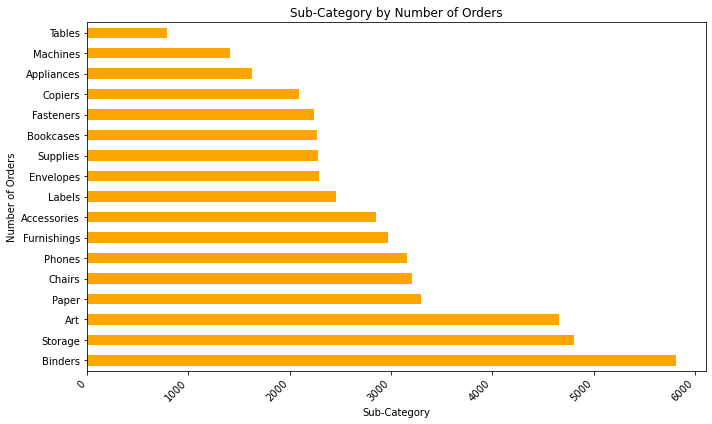

In [295]:
sub = df['sub-category'].value_counts()

plt.figure(figsize=(10, 6))
sub.plot(kind='barh', color='orange')
plt.title('Sub-Category by Number of Orders')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### 1) Metrics

In [296]:
# Calculating metrics
total_sales = df['sales'].sum()
total_quantity_sold = df['quantity'].sum()
avg_discount = df['discount'].mean()
total_profit = df['profit'].sum()
total_customers = df['customer_id'].nunique()
total_orders = len(df)

print('Total Sales:', total_sales)
print('Total Quantity Sold:', total_quantity_sold)
print('Average Discount:', avg_discount)
print('Total Profit:', total_profit)
print('Total Customers:', total_customers)
print('Total Orders:', total_orders)

Total Sales: 11823481.5305
Total Quantity Sold: 166544
Average Discount: 0.14481757877280266
Total Profit: 1349557.2874999999
Total Customers: 1590
Total Orders: 48240


In [297]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots



# Creating a subplot figure
fig = make_subplots(rows=2, cols=3, 
                    specs=[[{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}],
                           [{"type": "indicator"}, {"type": "indicator"}, {"type": "indicator"}]])

# Adding traces to each subplot
fig.add_trace(go.Indicator(
    mode="number",
    value=total_sales,
    title={"text": "Total Sales"}
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_quantity_sold,
    title={"text": "Total Quantity Sold"}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=avg_discount,
    title={"text": "Average Discount"},
    gauge={'axis': {'range': [0, 1]}, 'bar': {'color': "darkblue"}}
), row=1, col=3)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_profit,
    title={"text": "Total Profit"}
), row=2, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_customers,
    title={"text": "Total Customers"}
), row=2, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_orders,
    title={"text": "Total Orders"}
), row=2, col=3)

# Update layout
fig.update_layout(
    height=600, 
    width=900, 
    title_text="Business Metrics Overview",
    showlegend=False
)

# Show the plot
fig.show()


### 2) Best Selling Products

In [298]:
best_selling_prodcuts = df.groupby('product_name')['quantity'].sum().nlargest(10).reset_index()
best_selling_prodcuts.columns = ['Product Name', 'Total_Quantity_Sold']
best_selling_prodcuts

,Product Name,Total_Quantity_Sold
0,Staples,802
1,"Eldon File Cart, Single Width",310
2,"Cardinal Index Tab, Clear",303
3,"Rogers File Cart, Single Width",256
4,"Smead File Cart, Single Width",250
5,"Stockwell Paper Clips, Assorted Sizes",249
6,"Sanford Pencil Sharpener, Water Color",243
7,"Ibico Index Tab, Clear",241
8,"Avery Index Tab, Clear",235
9,"Stanley Pencil Sharpener, Water Color",227


#### *Most of the products are day-to-day usable.*

### 3) Category-wise Sales

In [299]:
import plotly.express as px

sales_by_category = df.groupby('category')['sales'].sum().reset_index()

fig = px.pie(sales_by_category, names='category', values='sales', 
             title='Sales Distribution by Category')

fig.show()

Text(0.5, 1.0, 'Sales Distribution by Category')

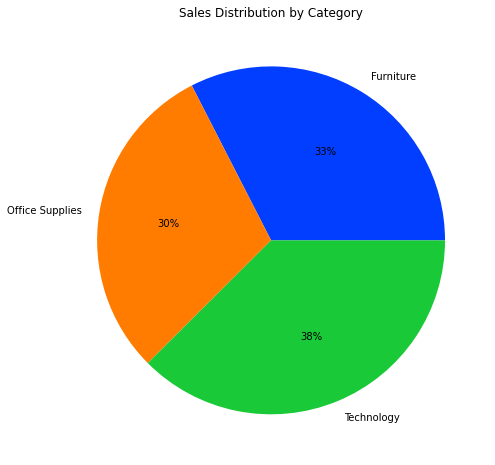

In [300]:
sales_by_category = df.groupby('category')['sales'].sum().reset_index()

plt.figure(figsize = (8,8))
palette_color = sns.color_palette('bright') 
plt.pie(sales_by_category['sales'], labels=sales_by_category['category'], autopct='%.0f%%', colors=palette_color)
plt.title("Sales Distribution by Category")

 #### *'Technology' is leading in Sales.*

### 4) Sales Over Time 

In [301]:
sales_df = df.groupby('order_date')['sales'].sum().reset_index()

fig = px.line(sales_df, x='order_date', y='sales', 
              title='Sales Trend Over Time',
              labels={'order_date': 'Order Date', 'sales': 'Sales'},
              line_shape='linear',  
              markers=True)  

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Order Date',
    yaxis_title='Sales',
    template='plotly_dark',  
    title_font_size=24,
    xaxis_tickformat='%b %Y', 
    yaxis_tickprefix='$', 
    showlegend=False
)

fig.show()

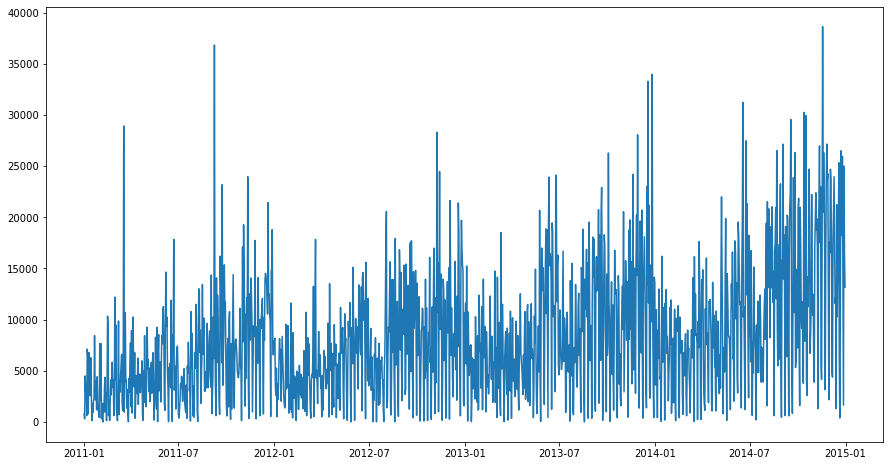

In [302]:
plt.figure(figsize = (15,8))
plt.plot(sales_df['order_date'].tolist(), sales_df['sales'].tolist())

#### *We can see that there is a positive trend for sales. Thus, we can say that sales has increased over time.*

### 5) Sales by Country (Geographical Analysis)

In [303]:
sales_by_country = df.groupby('country')['sales'].sum().nlargest(10).reset_index()
sales_by_country.sort_values(by='sales', ascending=False)

,country,sales
0,United States,2.116432e+06
1,Australia,8.898939e+05
2,France,7.989664e+05
3,Germany,5.970331e+05
4,China,5.880719e+05
5,India,5.758011e+05
6,Mexico,5.198434e+05
7,United Kingdom,4.934165e+05
8,Indonesia,3.814275e+05
9,Brazil,3.470753e+05


In [304]:
import plotly.express as px

geo_df = pd.DataFrame({
    'country': ['United States', 'Australia', 'France', 'Germany', 'China', 'India', 'Mexico', 'United Kingdom', 'Indonesia', 'Brazil'],
    'latitude': [37.0902, -25.2744, 46.6034, 51.1657, 35.8617, 20.5937, 23.6345, 55.3781, -0.7893, -14.2350],
    'longitude': [-95.7129, 133.7751, 1.8883, 10.4515, 104.1954, 78.9629, -102.5528, -3.4360, 113.9213, -51.9253]
})

# Merge sales data with geo data
merged_df = pd.merge(sales_by_country, geo_df, on='country')

# Create a choropleth map
fig = px.choropleth(merged_df, 
                    locations='country', 
                    locationmode='country names', 
                    color='sales',
                    title='Total Sales by Country',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)

# Customize the layout
fig.update_geos(projection_type="natural earth")
fig.update_layout(coloraxis_colorbar=dict(title='Total Sales'))

fig.show()


#### *USA regesitered the highest sales. However Brazil is last in terms of sales.*

### 6) Region-wise Profit

In [305]:
profit_by_region = df.groupby('region')['profit'].sum().reset_index()

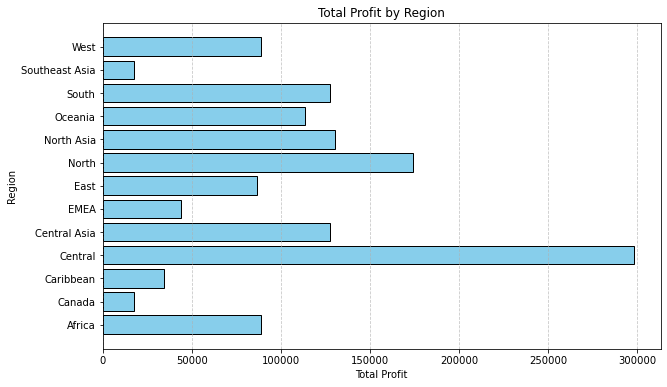

In [306]:
plt.figure(figsize=(10, 6))
plt.barh(profit_by_region['region'], profit_by_region['profit'], color='skyblue', edgecolor='k')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.title('Total Profit by Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 7) Profit by Month

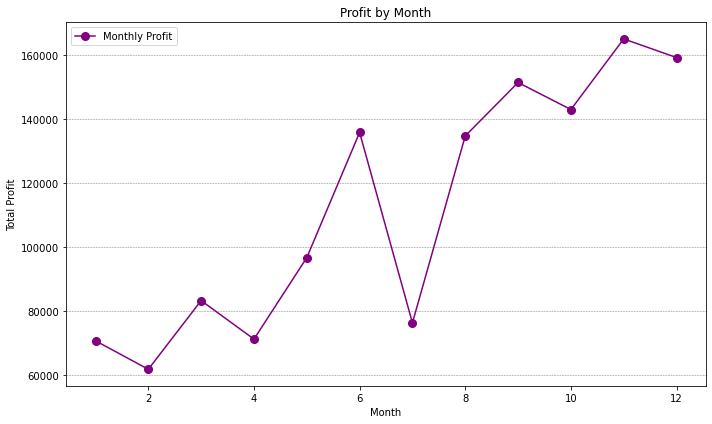

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing 'order_date' and 'profit' columns

# Create a new column 'month_name' with full month names (e.g., 'January')
df['month_name'] = pd.to_datetime(df['order_date'], errors='coerce').dt.month_name()

# Ensure month order (assuming month_name is a string type)
month_mapper = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
                 'May': 5, 'June': 6, 'July': 7, 'August': 8,
                 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['month_num'] = df['month_name'].map(month_mapper)
df.sort_values('month_num', inplace=True)  # Sort by the created month_num column

# Calculate profit per month
profit_by_month = df.groupby('month_num')['profit'].sum().reset_index()

# Line plot for profit by month
plt.figure(figsize=(10, 6))
plt.plot(profit_by_month['month_num'].tolist(), profit_by_month['profit'].tolist(), marker='o', markersize=8, linestyle='-', color='purple', label='Monthly Profit')
plt.title('Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')  # Add grid for better readability
plt.legend()
plt.tight_layout()


* Q1 (January - March): Profit starts relatively low.
* Q2 (April - June): Profit experiences a steady rise, peaking in June.
* Q3 (July - September): Profit dips in July but recovers significantly by September.
* Q4 (October - December): Profit shows a consistent increase, reaching its highest point in November and December.

### 8) Average and Total Profit Customer Segment wise  

In [308]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'market',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'shipping_cost',
       'order_priority', 'month_name', 'month_num'],
      dtype='object')

In [309]:
df_groupby_Customer_Segment = df.groupby('segment').agg({'profit':['mean', 'sum']})
df_groupby_Customer_Segment=df_groupby_Customer_Segment.reset_index()
df_groupby_Customer_Segment.sort_values(by=('profit', 'mean'), ascending=False)

segment     profit              
                     mean           sum
2  Home Office  29.227711  258548.33486
0     Consumer  27.788576  692935.92318
1    Corporate  27.533063  398073.02946

#### *Although Home Office segment registers low total profit, it displays higher average profit than other two segments.*

### 9) Most popular Sub-Category 

In [310]:
df['sub-category'].value_counts().iloc[:5]

sub-category
Binders    5813
Storage    4807
Art        4661
Paper      3298
Chairs     3211
Name: count, dtype: int64

#### *'Binders' is the most popular sub-category.*

### 10) Cities with the Most Average Shipping Cost.

In [311]:
shipcost_by_city = df.groupby('city')['shipping_cost'].mean().nlargest(10).reset_index()
shipcost_by_city.sort_values(by='shipping_cost')

,city,shipping_cost
9,Girga,245.060
8,Annecy-le-Vieux,246.170
7,Plaisir,255.965
6,Elbasan,301.730
5,Valparaíso de Goiás,320.290
4,Barletta,325.450
3,Salto,483.260
2,Behshahr,630.970
1,Paysandú,634.530
0,Kamina,678.150


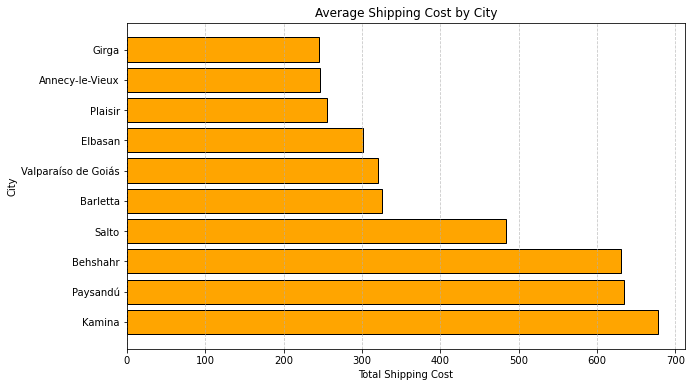

In [312]:
plt.figure(figsize=(10, 6))
plt.barh(shipcost_by_city['city'], shipcost_by_city['shipping_cost'], color='orange', edgecolor='k')
plt.xlabel('Total Shipping Cost')
plt.ylabel('City')
plt.title('Average Shipping Cost by City')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### *'Kamina' city has the highest average Shipping Cost.* 

### 11) Most loyal Customers

In [313]:
loyal_customers = df.groupby('customer_id')['order_id'].count().nlargest(10).reset_index()
loyal_customers = loyal_customers.rename(columns={'order_id':'total orders'})
loyal_customers

,customer_id,total orders
0,PO-18850,96
1,BE-11335,83
2,JG-15805,81
3,MP-17965,81
4,AF-10870,78
5,ZC-21910,78
6,AB-10015,77
7,CK-12205,77
8,HM-14860,77
9,TP-21130,77


#### *Customer with customer id 'PO-18850' is the most loyal. He has placed 96 orders till now.*

### 12)  Ship Mode wise Shipping Cost

In [314]:
df.groupby('ship_mode')['shipping_cost'].mean()

ship_mode
First Class       41.098684
Same Day          41.846353
Second Class      30.384278
Standard Class    19.838569
Name: shipping_cost, dtype: float64

#### *'First Class' shipping mode has the highest shiiping cost. It is followed by 'Same Day' ship mode.*

### 13) Returned Orders Analysis

In [315]:
df_return.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,3055.000000,804.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,20558.221931,70234.339552,268.336622,3.857283,0.112710,38.624820,29.164282
std,12336.149203,31258.748071,523.339484,2.290164,0.176957,212.899687,58.382261
min,15.000000,1852.000000,1.680000,1.000000,0.000000,-3701.892800,0.010000
25%,9178.500000,43229.000000,34.990000,2.000000,0.000000,1.420000,2.965000
50%,21383.000000,90006.000000,97.824000,3.000000,0.000000,12.712000,9.050000
75%,31732.500000,94109.000000,290.683000,5.000000,0.200000,42.690000,29.030000
max,41289.000000,99207.000000,13999.960000,14.000000,0.800000,6719.980800,923.630000


#### *Interpretations:*

* Total 3055 Orders are Returned.
* Average sales of Returned order is 268.34.
* Average Quantity of Returned order is 3.86.
* Average Discount of Returned order is 0.11.
* Average Profit of Returned order is 38.62.
* Average Shipping Cost of Returned order is 29.16.

In [316]:
df_return.describe(include='O').T

,count,unique,top,freq
Order ID,3055,1172,CA-2014-100111,14
Order Date,3055,745,29-08-2013,23
Ship Date,3055,795,17-11-2014,20
Ship Mode,3055,4,Standard Class,1756
Customer ID,3055,619,TB-21055,31
Customer Name,3055,619,Ted Butterfield,31
Segment,3055,3,Consumer,1584
City,3055,654,Los Angeles,117
State,3055,291,California,338
Country,3055,48,United States,804


#### *Interpretations:*

* Most Returned Orders were placed on 29th August, 2013.
* More than half of the returned orders had 'Standard Class' ship mode.
* Customer with customer id 'TB-21055' returned the most number of orders.
* More than half of the returned orders were placed by 'Consumer' segment customers.
* 'California' emerged as a city with most number of returned orders.
* '	TEC-PH-10002564' is the most returned product.
* 'Office Supplies' is the most returned category.
* 'Staples' is the most returned sub-category .
* More than half of the returned orders had 'Medium' Order Priority.

### 14) To minimize returned orders, what features are most influential?

In [317]:
new_df = df_orders.merge(df_returns, on='Order ID', how='left')

#### Pre-processing

In [318]:
new_df = new_df[~new_df.duplicated()]
new_df = new_df.drop(['Postal Code'], axis=1)
new_df = new_df.rename(columns={'Row ID': 'id',
                        'Order ID': 'order_id',
                        'Order Date': 'order_date',
                        'Ship Date': 'ship_date',
                        'Ship Mode': 'ship_mode',
                        'Customer ID': 'customer_id',
                        'Customer Name': 'customer_name',
                        'Segment': 'segment',
                        'City': 'city',
                        'State': 'state',
                        'Country': 'country',
                        'Market': 'market',
                        'Region': 'region',
                        'Product ID': 'product_id',
                        'Category': 'category',
                        'Sub-Category': 'sub-category',
                        'Product Name': 'product_name',
                        'Sales': 'sales',
                        'Quantity': 'quantity',
                        'Discount': 'discount',
                        'Profit': 'profit',
                        'Shipping Cost': 'shipping_cost',
                        'Order Priority': 'order_priority'})
new_df = new_df.drop('id', axis=1)

In [319]:
new_df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'market',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit', 'shipping_cost',
       'order_priority', 'Returned'],
      dtype='object')

In [320]:
new_df = new_df.drop(['order_id', 'order_date', 'ship_date', 'customer_id', 'customer_name', 'product_id'], axis=1)

#### Categorical Encoding

In [321]:
cat_cols = [col for col in new_df.columns if new_df[col].dtype=='O']

In [322]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()

for col in cat_cols:
    new_df[col] = encoder.fit_transform(new_df[col])

#### Correlation Heatmap

In [323]:
return_corr = new_df.corr()['Returned'].reset_index()
return_corr['Returned'] = return_corr['Returned'].abs()
return_corr.sort_values(by='Returned', ascending=False)

,index,Returned
16,Returned,1.000000
6,region,0.105678
5,market,0.046970
2,city,0.043198
11,quantity,0.042131
12,discount,0.035784
13,profit,0.014487
0,ship_mode,0.013919
14,shipping_cost,0.012373
10,sales,0.011367


<AxesSubplot:>

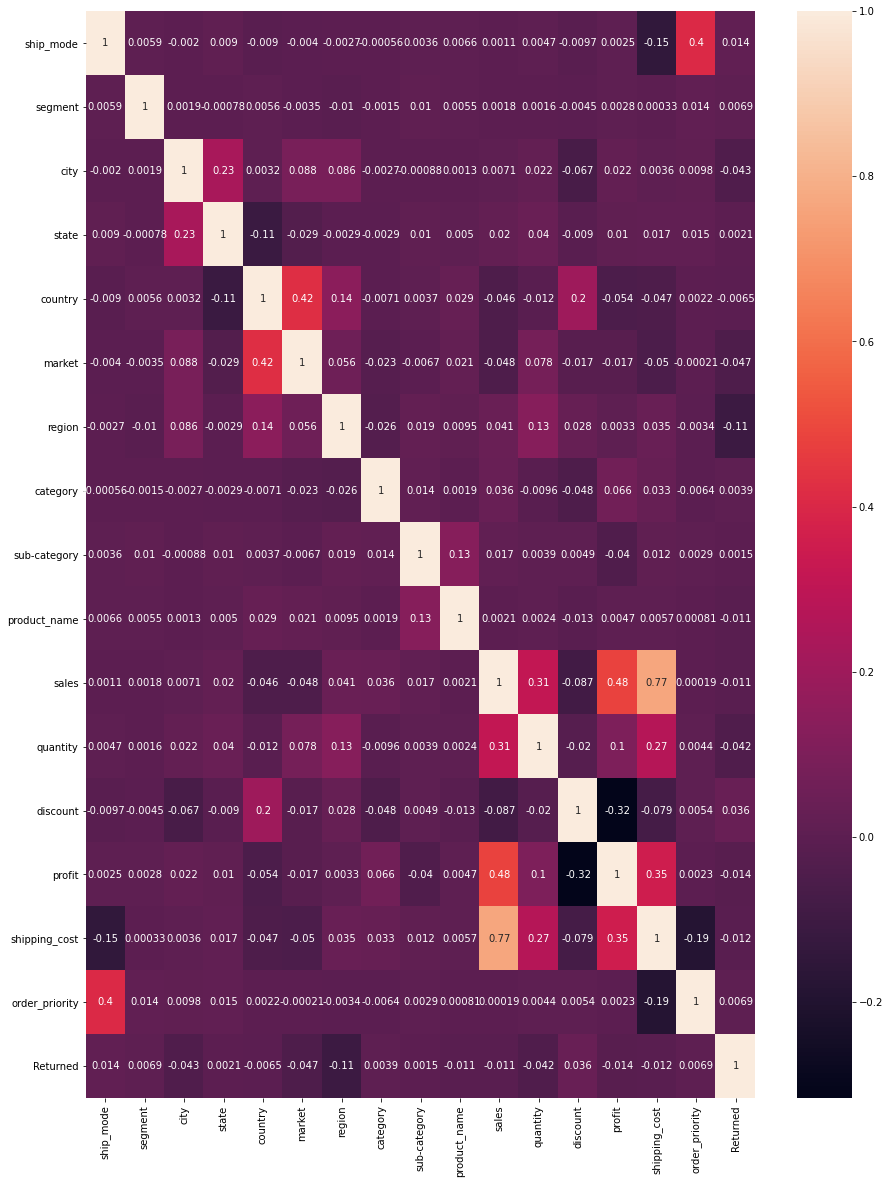

In [324]:
plt.figure(figsize=(15,20))
sns.heatmap(new_df.corr(), annot=True)

* #### From the cooreleation we can interpret that *'region', 'market', 'city', 'quantity' and 'discount'* are the most important features to minimize the returned orders.